In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
questionnaire = pd.read_excel("source/data/smell_behavior_sociodemographics.xlsx")

# Extract valid entries (id) from cleaned questionnaire dataframe
included = questionnaire["id"].unique()

In [3]:
# Load self and other body odor dataframes
self = pd.read_excel("source/data/body_silhouettes_self.xlsx")
other = pd.read_excel("source/data/body_silhouettes_other.xlsx")

# Filter for valid entries
self = self[self['id'].isin(included)]
other = other[other['id'].isin(included)]

In [4]:
# Group by id and count the number of rows for each id
self_count = self.groupby("id").size().reset_index(name='count')
self_agg = pd.merge(self[["country","id"]], self_count, on="id").drop_duplicates()
self_agg

,country,id,count
0,HKG,1,9
9,HKG,2,14
23,HKG,3,9
32,HKG,4,9
41,HKG,5,30
...,...,...,...
23786,VUT,2643,3
23789,VUT,2644,4
23793,VUT,2645,4
23797,VUT,2646,4


In [5]:
# Group by id and count the number of rows for each id
other_count = other.groupby("id").size().reset_index(name='count')
other_agg = pd.merge(other[["country","id"]], other_count, on="id").drop_duplicates()
other_agg

,country,id,count
0,HKG,1.0,15
2,HKG,2.0,27
4,HKG,3.0,16
6,HKG,4.0,7
8,HKG,5.0,5
...,...,...,...
2935,VUT,2643.0,2
2936,VUT,2644.0,3
2937,VUT,2645.0,4
2938,VUT,2646.0,2


Text(0.5, 1.0, "Number of markers given for other people's body odor perception")

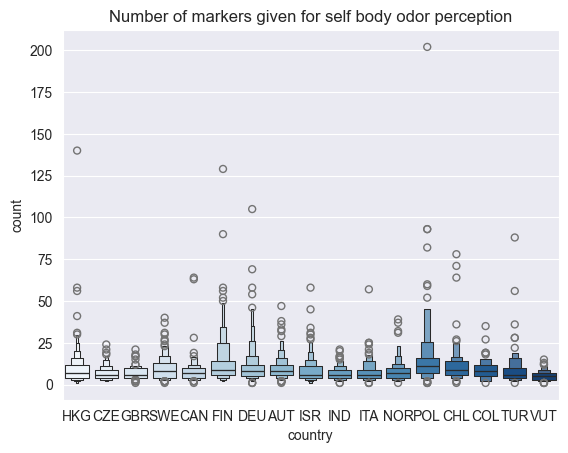

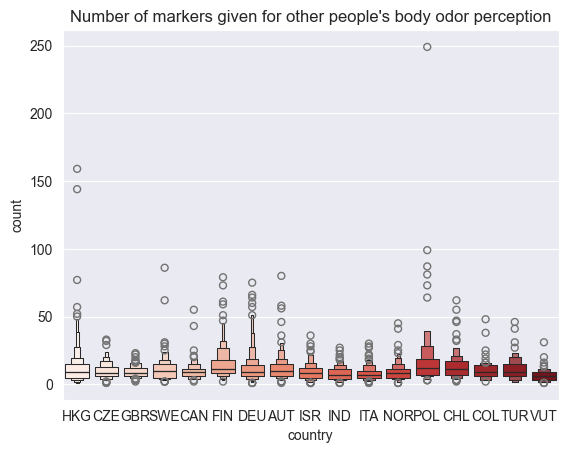

In [6]:
plt.figure()
sns.boxenplot(data=self_agg, x="country", y="count", palette="Blues")
plt.title("Number of markers given for self body odor perception")

plt.figure()
sns.boxenplot(data=other_agg, x="country", y="count", palette="Reds")
plt.title("Number of markers given for other people's body odor perception")

In [7]:
questionnaire.head()

,id,country,survey_language,age,gender,birthplace,spoken_languages_01,spoken_languages_02,spoken_languages_03,spoken_languages_04,...,armpit,children,hand_armpit,hand_crotch,hands,partner,shirt,shoes,strangers,underpants
0,1,HKG,Chinese,33,male,Hong Kong,Cantonese,NaN,NaN,NaN,...,3.0,-1.0,1.0,3.0,3.0,-1.0,4.0,4.0,2.0,4.0
1,2,HKG,Chinese,27,male,Hong Kong,Cantonese,NaN,NaN,NaN,...,4.0,-1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,3,HKG,Chinese,39,male,Hong Kong,Cantonese,NaN,NaN,NaN,...,3.0,-1.0,3.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0
3,4,HKG,Chinese,19,male,Hong Kong,Cantonese,NaN,NaN,NaN,...,3.0,-1.0,3.0,2.0,3.0,1.0,4.0,3.0,1.0,3.0
4,5,HKG,Chinese,31,male,Hong Kong,Cantonese,NaN,NaN,NaN,...,3.0,4.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0,3.0


In [8]:
self.head()

,country,id,self_y,self_x
0,HKG,1,128,106
1,HKG,1,129,176
2,HKG,1,222,129
3,HKG,1,380,110
4,HKG,1,393,146


In [9]:
other.head()

,country,id,other_y,other_x
0,HKG,1.0,127.0,107.0
1,HKG,1.0,131.0,181.0
2,HKG,2.0,124.0,395.0
3,HKG,2.0,140.0,122.0
4,HKG,3.0,138.0,102.0


### Body odors silhouettes - other persons' body (2a)

Body odor perceived from body of others


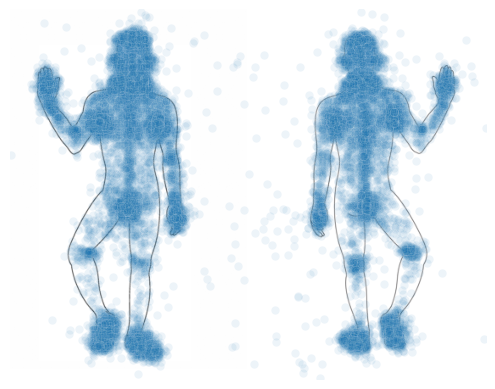

           front ----------------------------- back


In [10]:
df = other
#df = other.loc[other["country"]=="GBR"] # to choose a particular country

## Plot markings on original image
# Load image
map_img = mpimg.imread('source/img/humanbody_clear.png') # change path to image path

# Plot image
hmax = sns.scatterplot(x="other_x", y="other_y", data=df, alpha = 0.08, zorder=2)

hmax.imshow(map_img)
hmax.invert_yaxis() 
hmax.invert_xaxis()
    
hmax.set_xlim(hmax.get_xlim()[::-1])
hmax.set_ylim(hmax.get_ylim()[::-1])

plt.axis("off")
#plt.savefig("bodysilhouette_other.svg", dpi=1200, format="svg")
print("Body odor perceived from body of others")
plt.show()
print("           front ----------------------------- back")

#### Compare between countries

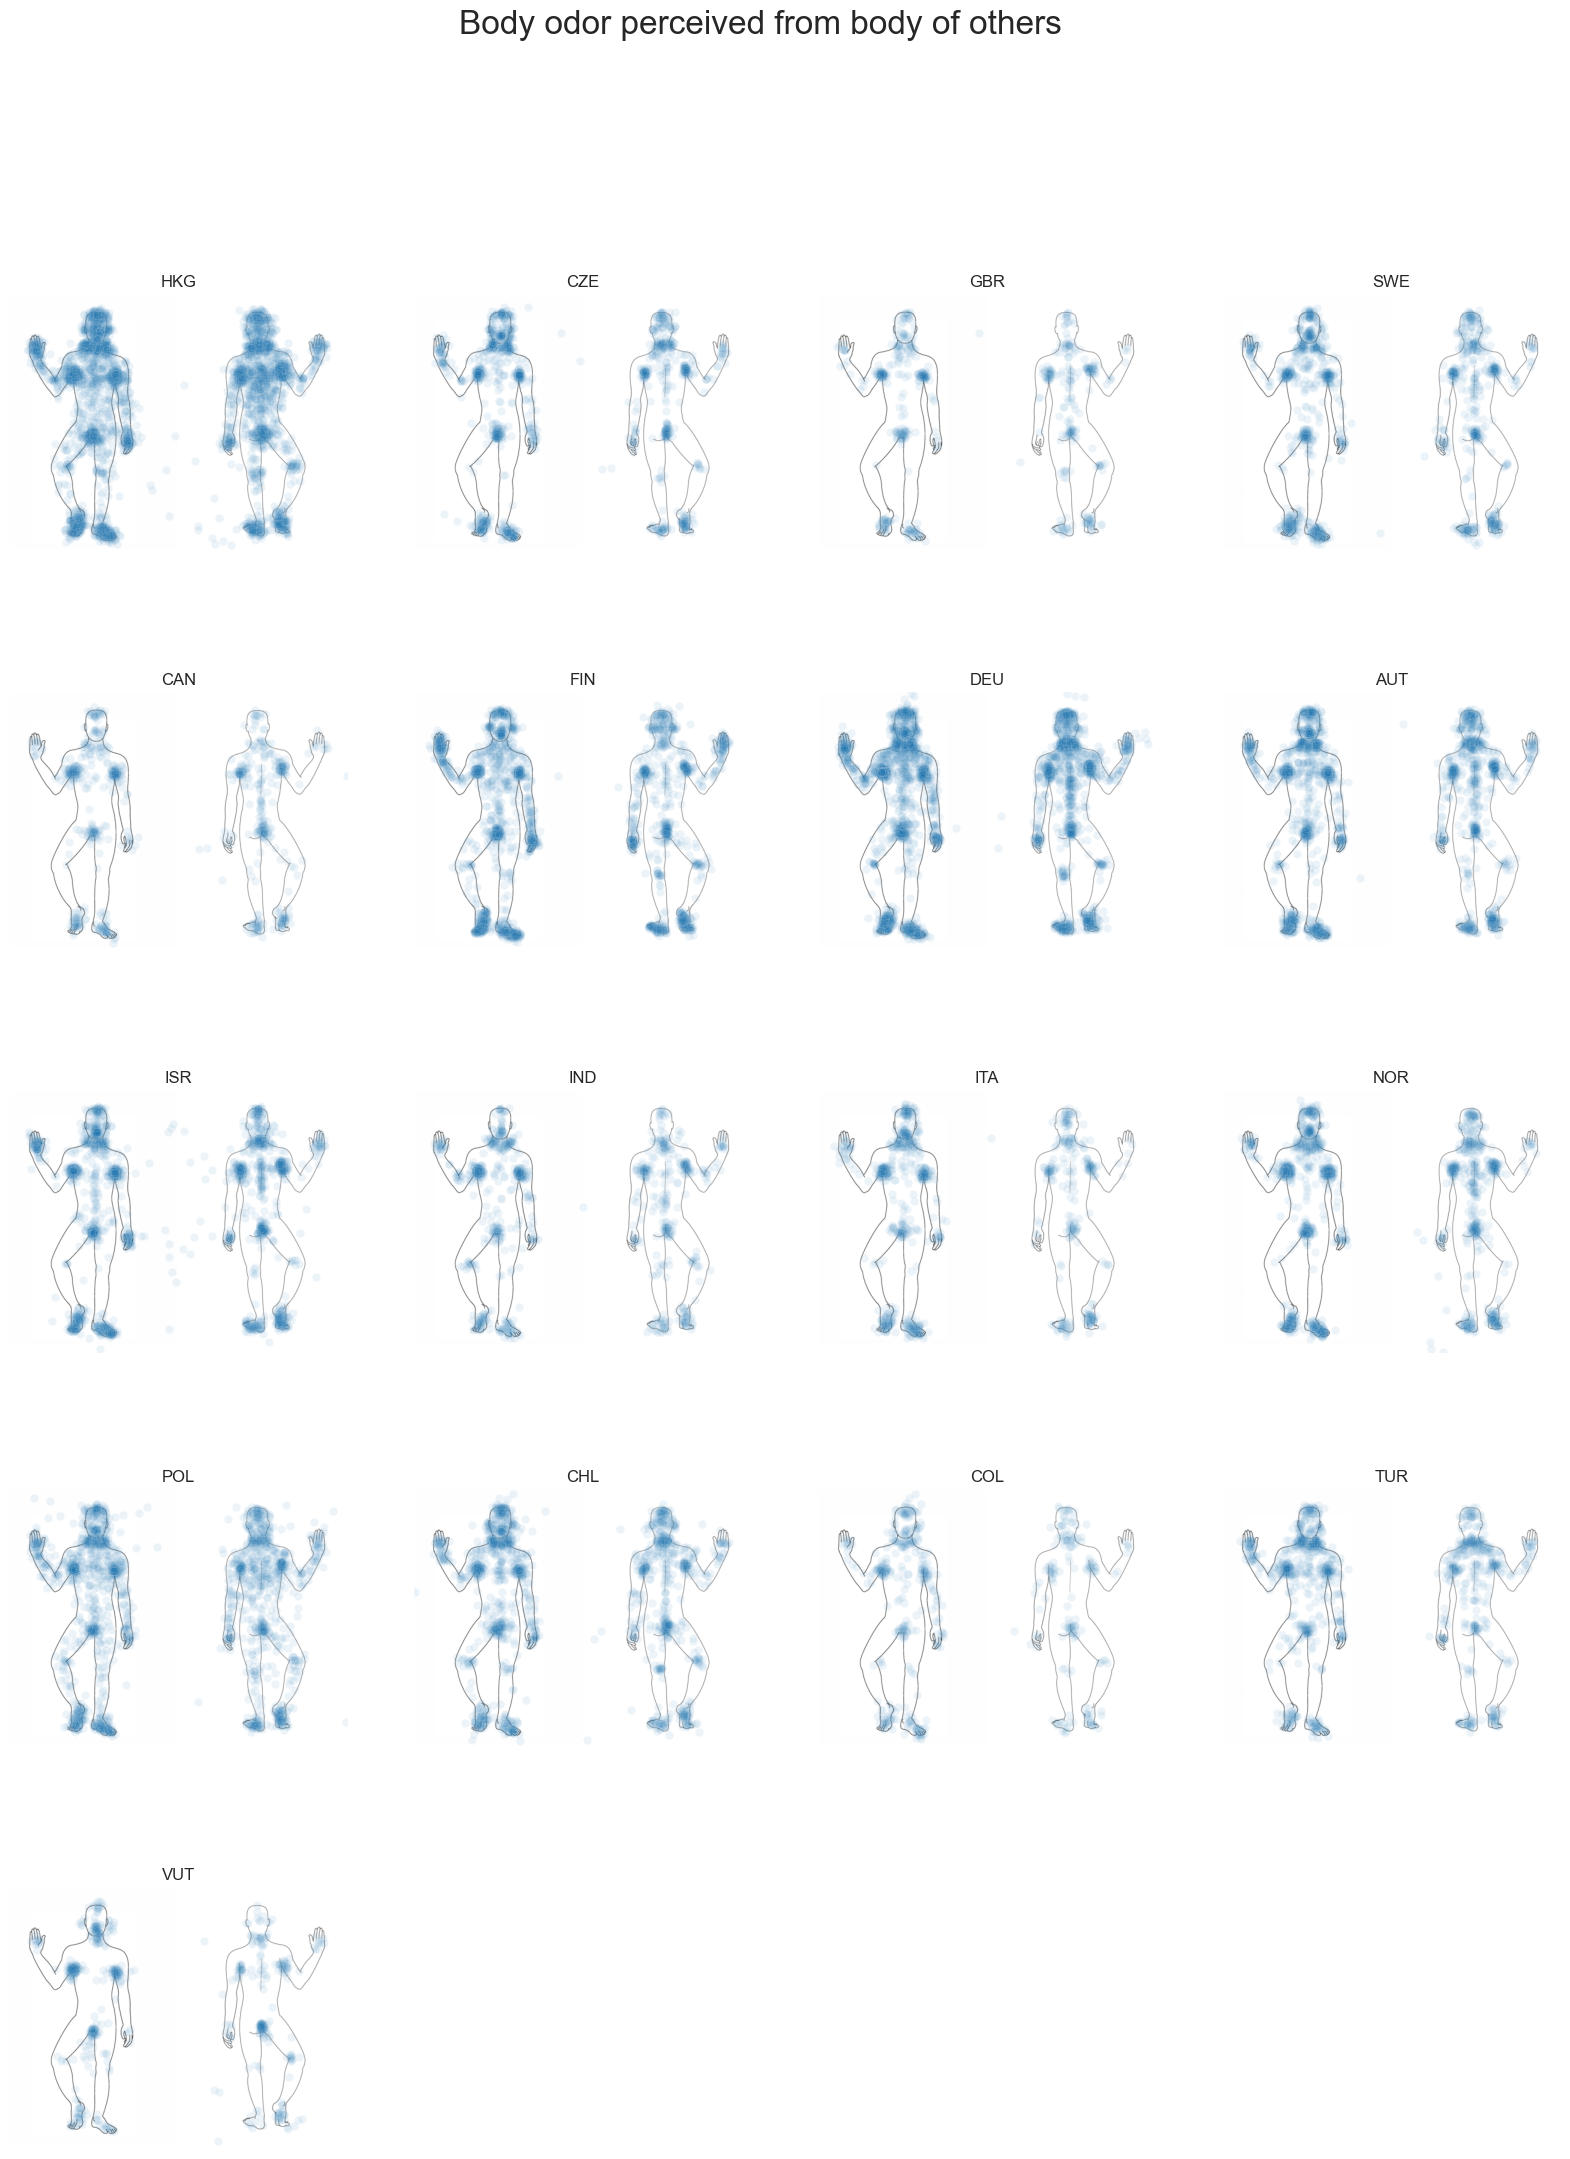

In [11]:
# Assuming 'df' is your DataFrame
df = other.dropna()

unique_countries = df['country'].unique()  # Get unique countries
n_countries = len(unique_countries)
n_cols = 4  # Subplots per row
n_rows = np.ceil(n_countries / n_cols).astype(int)  # Calculate the number of rows needed

# Create a grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5*n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the unique countries and plot on each subplot
for ax, country in zip(axes, unique_countries):
    # Filter df for each country
    country_df = df[df['country'] == country]
    
    # Plot image
    map_img = mpimg.imread('source/img/humanbody_clear.png')  # Change path to image path
    
    # Plotting
    hmax = sns.scatterplot(x="other_x", y="other_y", data=country_df, alpha=0.08, zorder=2, ax=ax)
    
    hmax.imshow(map_img)
    hmax.invert_yaxis()
    hmax.invert_xaxis()
    
    hmax.set_xlim(hmax.get_xlim()[::-1])
    hmax.set_ylim(hmax.get_ylim()[::-1])
    
    ax.axis("off")
    ax.set_title(country)

# Hide any unused subplots if the total number of countries doesn't fill the last row
for i in range(n_countries, n_cols * n_rows):
    fig.delaxes(axes[i])

plt.suptitle("Body odor perceived from body of others", fontsize=24)
plt.show()

### Body odors silhouettes - own body (2b)

Body odor perceived from own body


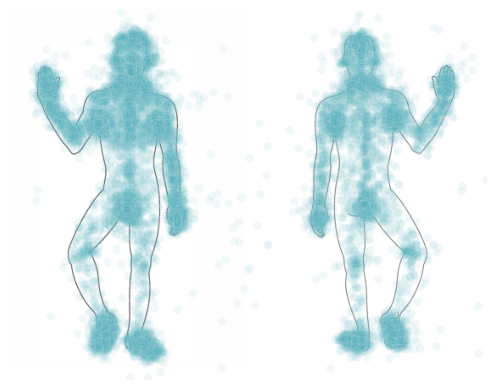

           front ----------------------------- back


In [12]:
df = self
#df = self.loc[self["country"]=="GBR"] # to choose a particular country

## Plot markings on original image
# Load image
map_img = mpimg.imread('source/img/humanbody_clear.png') # change path to image path

# Plot image
hmax = sns.scatterplot(x="self_x", y="self_y", data=df, alpha = 0.08, zorder=2, color = "#52B2BF")

hmax.imshow(map_img)
hmax.invert_yaxis() 
hmax.invert_xaxis()
    
hmax.set_xlim(hmax.get_xlim()[::-1])
hmax.set_ylim(hmax.get_ylim()[::-1])

plt.axis("off")
#plt.savefig("bodysilhouette_self.svg", dpi=1200, format="svg")
print("Body odor perceived from own body")
plt.show()
print("           front ----------------------------- back")

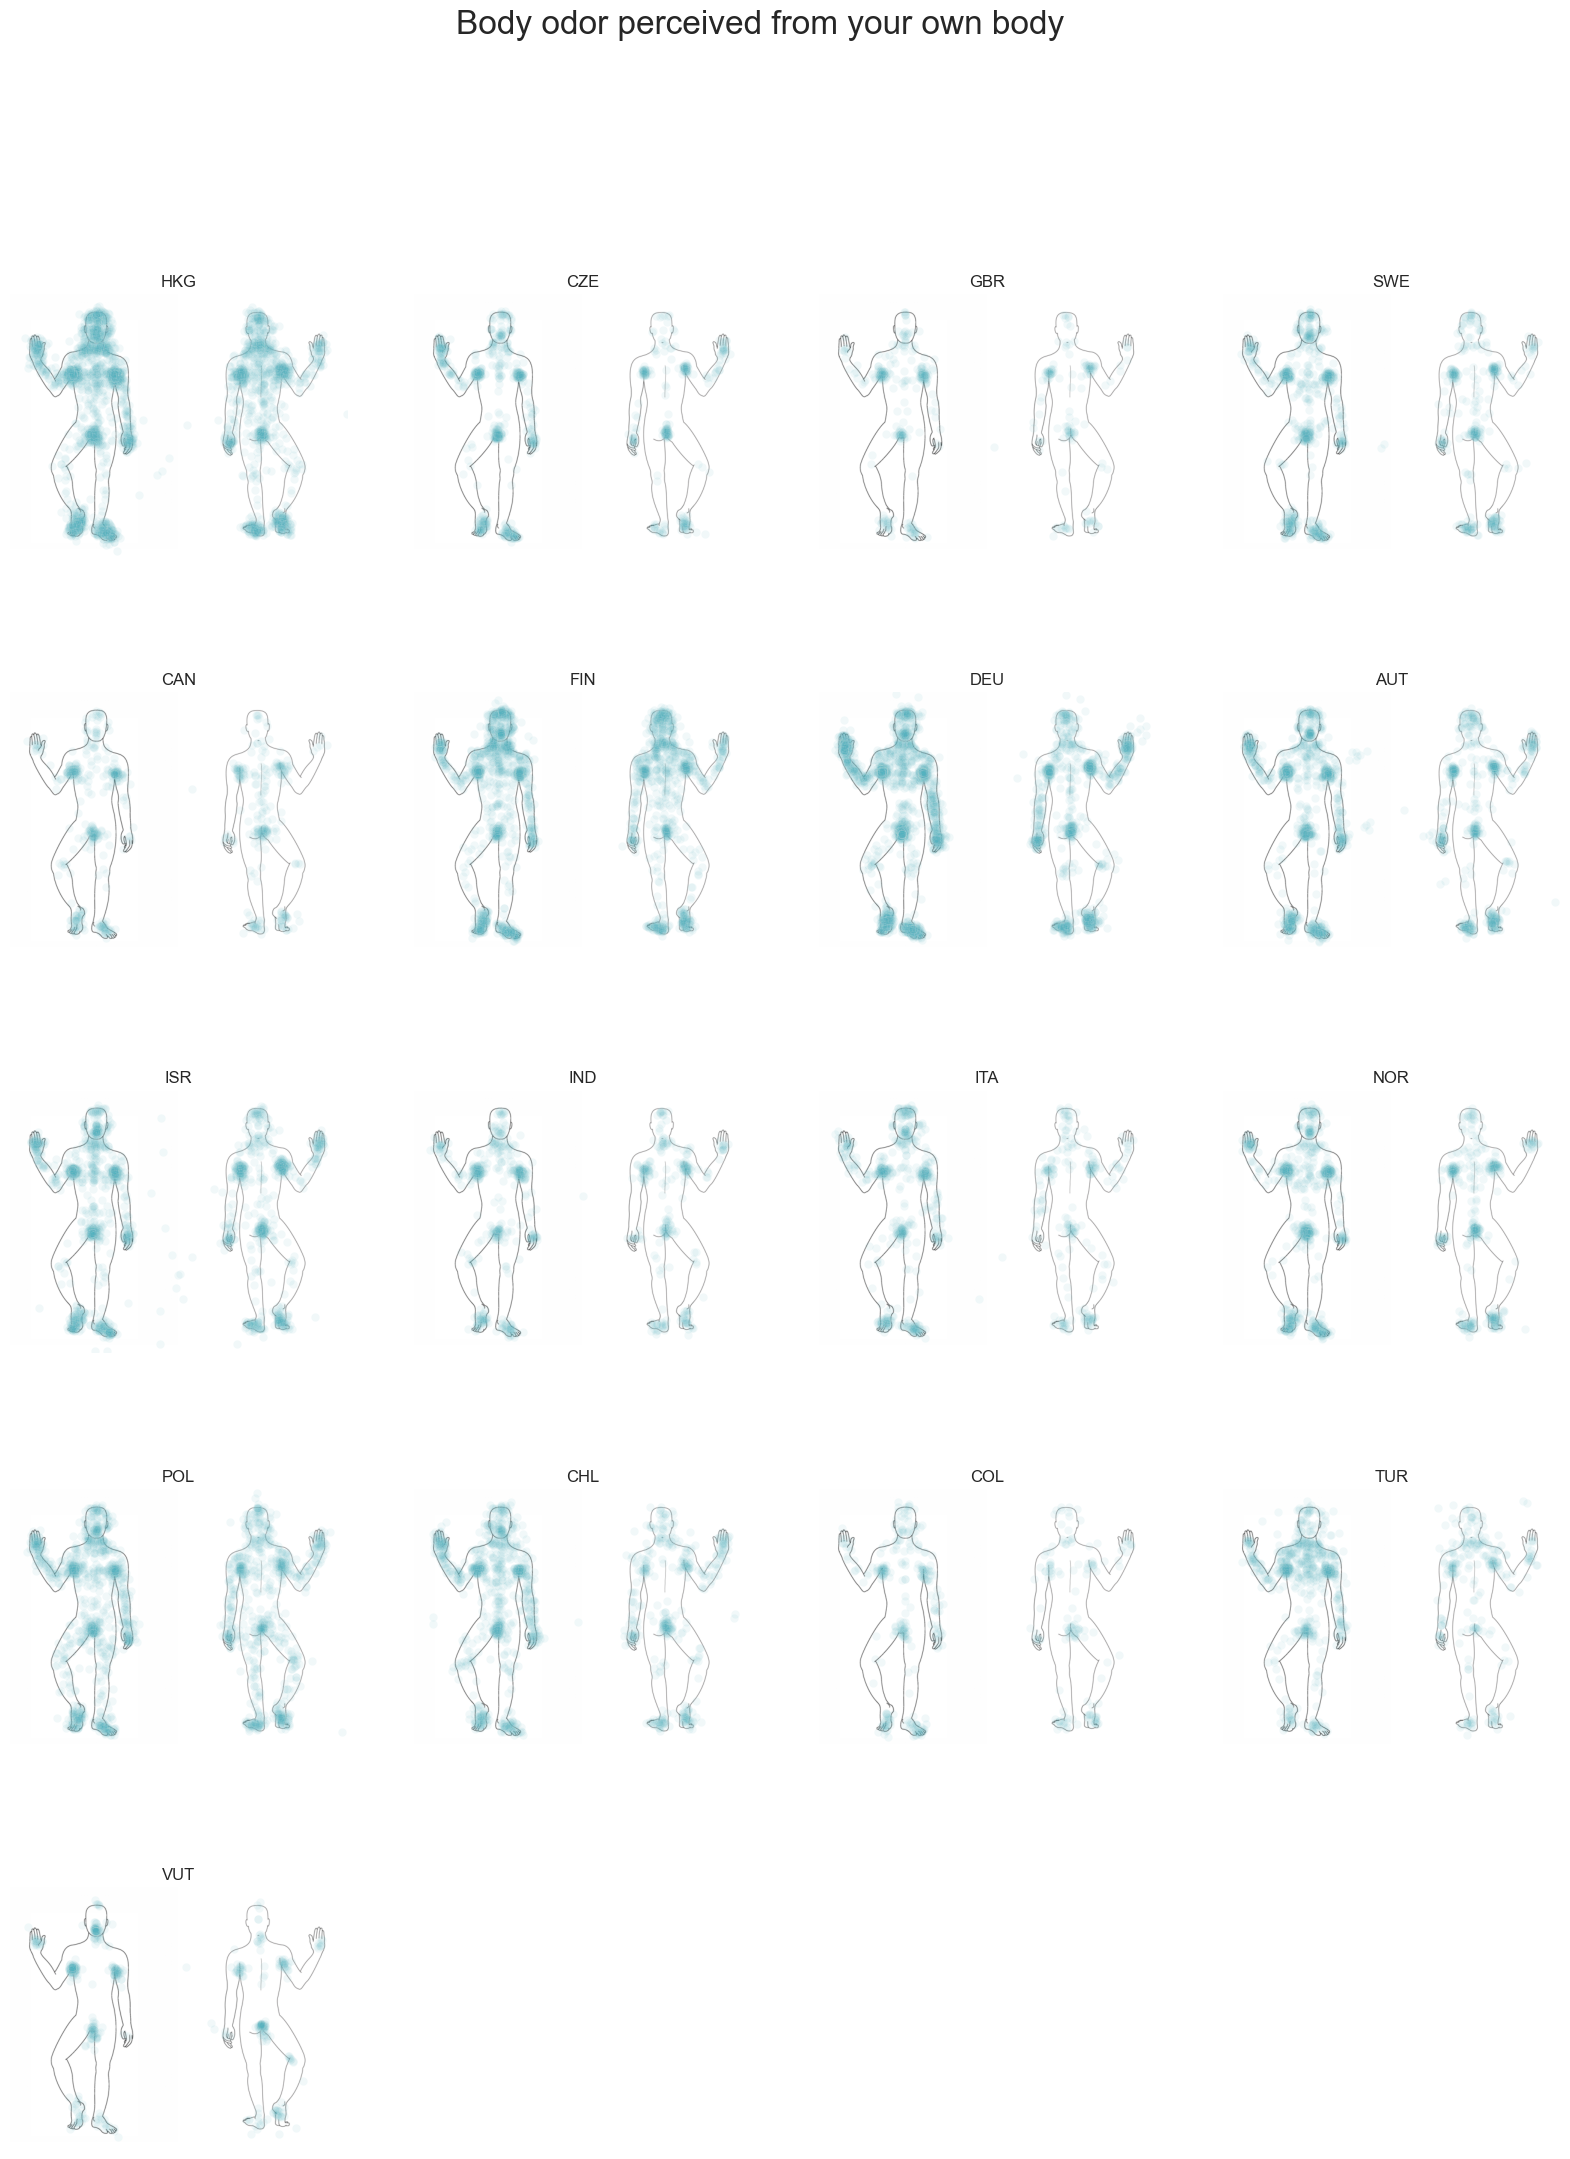

In [13]:
df = self.dropna()

unique_countries = df['country'].unique()  # Get unique countries
n_countries = len(unique_countries)
n_cols = 4  # Subplots per row
n_rows = np.ceil(n_countries / n_cols).astype(int)  # Calculate the number of rows needed

# Create a grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5*n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the unique countries and plot on each subplot
for ax, country in zip(axes, unique_countries):
    # Filter df for each country
    country_df = df[df['country'] == country]
    
    # Plot image
    map_img = mpimg.imread('source/img/humanbody_clear.png')  # Change path to image path
    
    # Plotting
    hmax = sns.scatterplot(x="self_x", y="self_y", data=country_df, alpha=0.08, zorder=2, ax=ax,color = "#52B2BF")
    
    hmax.imshow(map_img)
    hmax.invert_yaxis()
    hmax.invert_xaxis()
    
    hmax.set_xlim(hmax.get_xlim()[::-1])
    hmax.set_ylim(hmax.get_ylim()[::-1])
    
    ax.axis("off")
    ax.set_title(country)

# Hide any unused subplots if the total number of countries doesn't fill the last row
for i in range(n_countries, n_cols * n_rows):
    fig.delaxes(axes[i])

plt.suptitle("Body odor perceived from your own body", fontsize=24)
plt.show()
